# 🏥 Project Title

### No-Show Appointments Analysis

## 📖 Project Overview

Missed medical appointments are a significant challenge for healthcare systems, leading to wasted resources, increased costs, and delayed treatments.

This project analyzes a dataset of **110,000+ hospital appointments in Brazil** to explore the factors that influence whether patients show up for their scheduled appointments.

By examining demographics, health conditions, communication methods, geography, and scheduling factors, this analysis aims to uncover actionable insights that can help hospitals reduce no-shows and improve patient care.

## ❓ Problem Statements
#### 1. Overall Trends

What percentage of patients miss their appointments?

#### 2. Demographics

Does age affect the likelihood of a no-show?

Are males or females more likely to miss appointments?

#### 3. Health Conditions

Do patients with hypertension, diabetes, alcoholism, or disabilities have higher or lower no-show rates?

#### 4. Communication

Do SMS reminders reduce the probability of a no-show?

#### 5. Geography

Are some neighbourhoods more prone to no-shows than others?

#### 6. Scheduling Factors

Does the waiting time (days between scheduling and appointment) influence no-shows?

#### 7. Socioeconomic Factors

Do patients on the scholarship program (social welfare) show different attendance patterns?

## Import Libraries

In [112]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Jupyter magic command to show plots inline
%matplotlib inline

# For cleaner plots
sns.set(style="whitegrid")

## Load DataSet 

In [113]:
# Load Dataset
appointments = pd.read_csv(r"C:\Users\paras\Python_Projects\Project_Healthcare_Analysis\dataset\KaggleV2-May-2016.csv")

# Check dataset Shape
print("Dataset Shape" ,appointments.shape)

# Display the first 5 rows of dataset
appointments.head(5)

Dataset Shape (110527, 14)


PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [114]:
# Basic info about dataset
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [115]:
# Summary statistics (for numeric columns)
appointments.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [116]:
# Check missing values
appointments.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

## Data Cleaning 

In [117]:
# Rename column for consistency
appointments.rename(columns={
    "Hipertension" : "Hypertension",
    "Handcap"      : "Handicap"
}, inplace=True)

In [118]:
# Convert dates to datetimes
# object  type to datetime type
appointments["ScheduledDay"] = pd.to_datetime(appointments["ScheduledDay"])
appointments["AppointmentDay"] = pd.to_datetime(appointments["AppointmentDay"])

In [119]:
# Checking how many invalid records in dataset
invalid_ages = appointments[(appointments['Age'] < 0) | (appointments['Age'] > 100)]
print(len(invalid_ages))


8


In [120]:
# Calculate median of valid ages
median_age = appointments['Age'][(appointments['Age'] >= 0) & (appointments['Age'] <= 100)].median()

# Replace invalid ages (<0 or >100) with median
appointments.loc[(appointments['Age'] < 0) | (appointments['Age'] > 100), 'Age'] = median_age

In [121]:
# Convert PatientId to integer
# PatientId was float64, which is unnecessary.
appointments["PatientId"] = appointments["PatientId"].astype("int64")

In [122]:
# Quick check
# info() confirms data types and non-null counts.
appointments.info()
# describe() gives basic statistics for Age
appointments["Age"].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

count    110527.000000
mean         37.084513
std          23.102329
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         100.000000
Name: Age, dtype: float64

In [123]:
# Creating useful new columns for analysis

# Waiting days between scheduling and appointment
appointments['WaitDays'] = (appointments['AppointmentDay'] - appointments['ScheduledDay']).dt.days

# Day of the week of appointment
appointments['AppointmentWeekday'] = appointments['AppointmentDay'].dt.day_name()

# Month of appointment
appointments['AppointmentMonth'] = appointments['AppointmentDay'].dt.month


In [124]:
# No-show is currently "Yes" / "No". Convert it into 0 and 1
appointments['No-show'] = appointments['No-show'].map({'No': 0, 'Yes': 1})

In [125]:
# Quick check
appointments.head()

PatientId  AppointmentID Gender              ScheduledDay  \
0   29872499824296        5642903      F 2016-04-29 18:38:08+00:00   
1  558997776694438        5642503      M 2016-04-29 16:08:27+00:00   
2    4262962299951        5642549      F 2016-04-29 16:19:04+00:00   
3     867951213174        5642828      F 2016-04-29 17:29:31+00:00   
4    8841186448183        5642494      F 2016-04-29 16:07:23+00:00   

             AppointmentDay  Age      Neighbourhood  Scholarship  \
0 2016-04-29 00:00:00+00:00   62    JARDIM DA PENHA            0   
1 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   
2 2016-04-29 00:00:00+00:00   62      MATA DA PRAIA            0   
3 2016-04-29 00:00:00+00:00    8  PONTAL DE CAMBURI            0   
4 2016-04-29 00:00:00+00:00   56    JARDIM DA PENHA            0   

   Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  No-show  \
0             1         0           0         0             0        0   
1             0         0           0         0             0        0   
2             0         0           0         0             0        0   
3             0         0           0         0             0        0   
4             1         1           0         0             0        0   

   WaitDays AppointmentWeekday  AppointmentMonth  
0        -1             Friday                 4  
1        -1             Friday                 4  
2        -1             Friday                 4  
3        -1             Friday                 4  
4        -1             Friday                 4

In [155]:
# Save cleaned dataset
appointments.to_csv("appointments_cleaned.csv", index=False,sep=";")


## Exploratory Data Analysis (EDA)

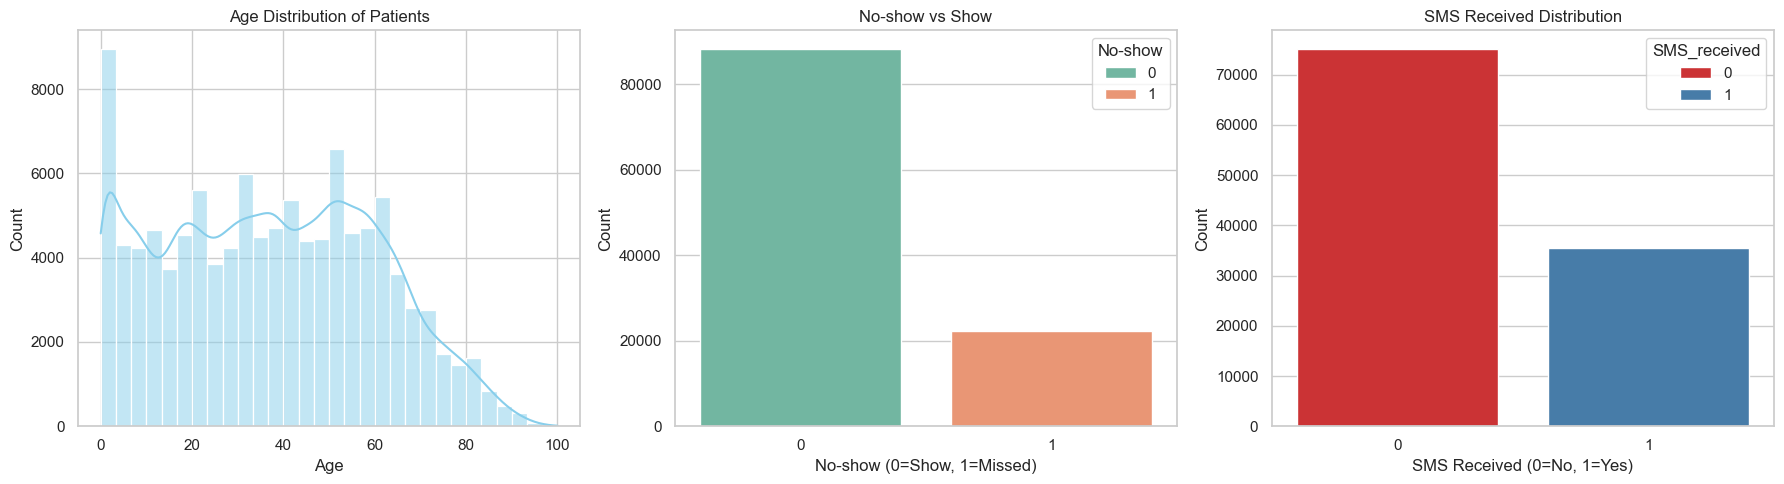

In [127]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Age Distribution
sns.histplot(appointments["Age"], bins=30, kde=True, color="skyblue",ax=axes[0])
axes[0].set_title("Age Distribution of Patients")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")

# No-show Count
sns.countplot(x="No-show" , data=appointments, hue="No-show" ,palette="Set2",ax=axes[1])
axes[1].set_title("No-show vs Show")
axes[1].set_xlabel("No-show (0=Show, 1=Missed)")
axes[1].set_ylabel("Count")

# SMS Received Count
sns.countplot(x="SMS_received", data=appointments, hue="SMS_received" ,palette="Set1" , ax=axes[2])
axes[2].set_title("SMS Received Distribution")
axes[2].set_xlabel("SMS Received (0=No, 1=Yes)")
axes[2].set_ylabel("Count")

plt.tight_layout()

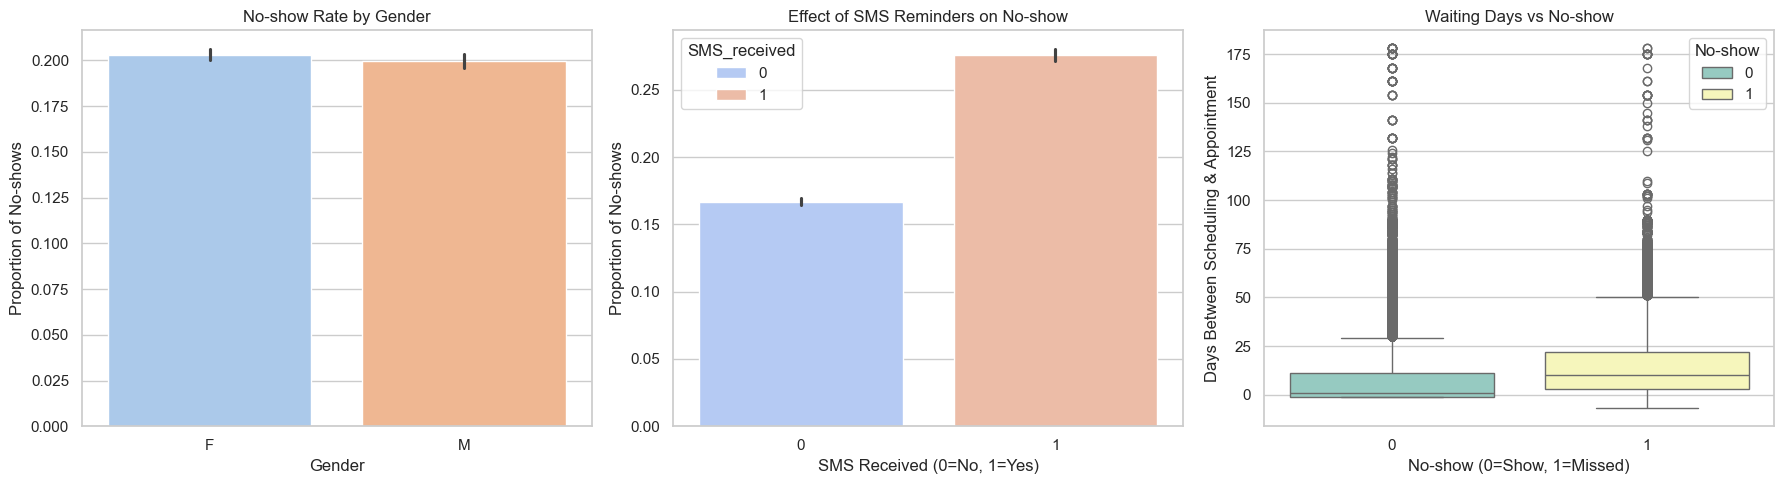

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Gender vs No-show
sns.barplot(x="Gender" ,y="No-show" , data=appointments, hue="Gender", ax=axes[0] , palette="pastel")
axes[0].set_title("No-show Rate by Gender")
axes[0].set_xlabel("Gender")
axes[0].set_ylabel("Proportion of No-shows")

# SMS vs No-show
sns.barplot(x="SMS_received", y="No-show", data=appointments, hue="SMS_received",ax=axes[1], palette="coolwarm")
axes[1].set_title("Effect of SMS Reminders on No-show")
axes[1].set_xlabel("SMS Received (0=No, 1=Yes)")
axes[1].set_ylabel("Proportion of No-shows")

# WaitDays vs No-show
sns.boxplot(x="No-show", y="WaitDays", data=appointments, hue="No-show",ax=axes[2] ,palette="Set3")
axes[2].set_title("Waiting Days vs No-show")
axes[2].set_xlabel("No-show (0=Show, 1=Missed)")
axes[2].set_ylabel("Days Between Scheduling & Appointment")

plt.tight_layout()

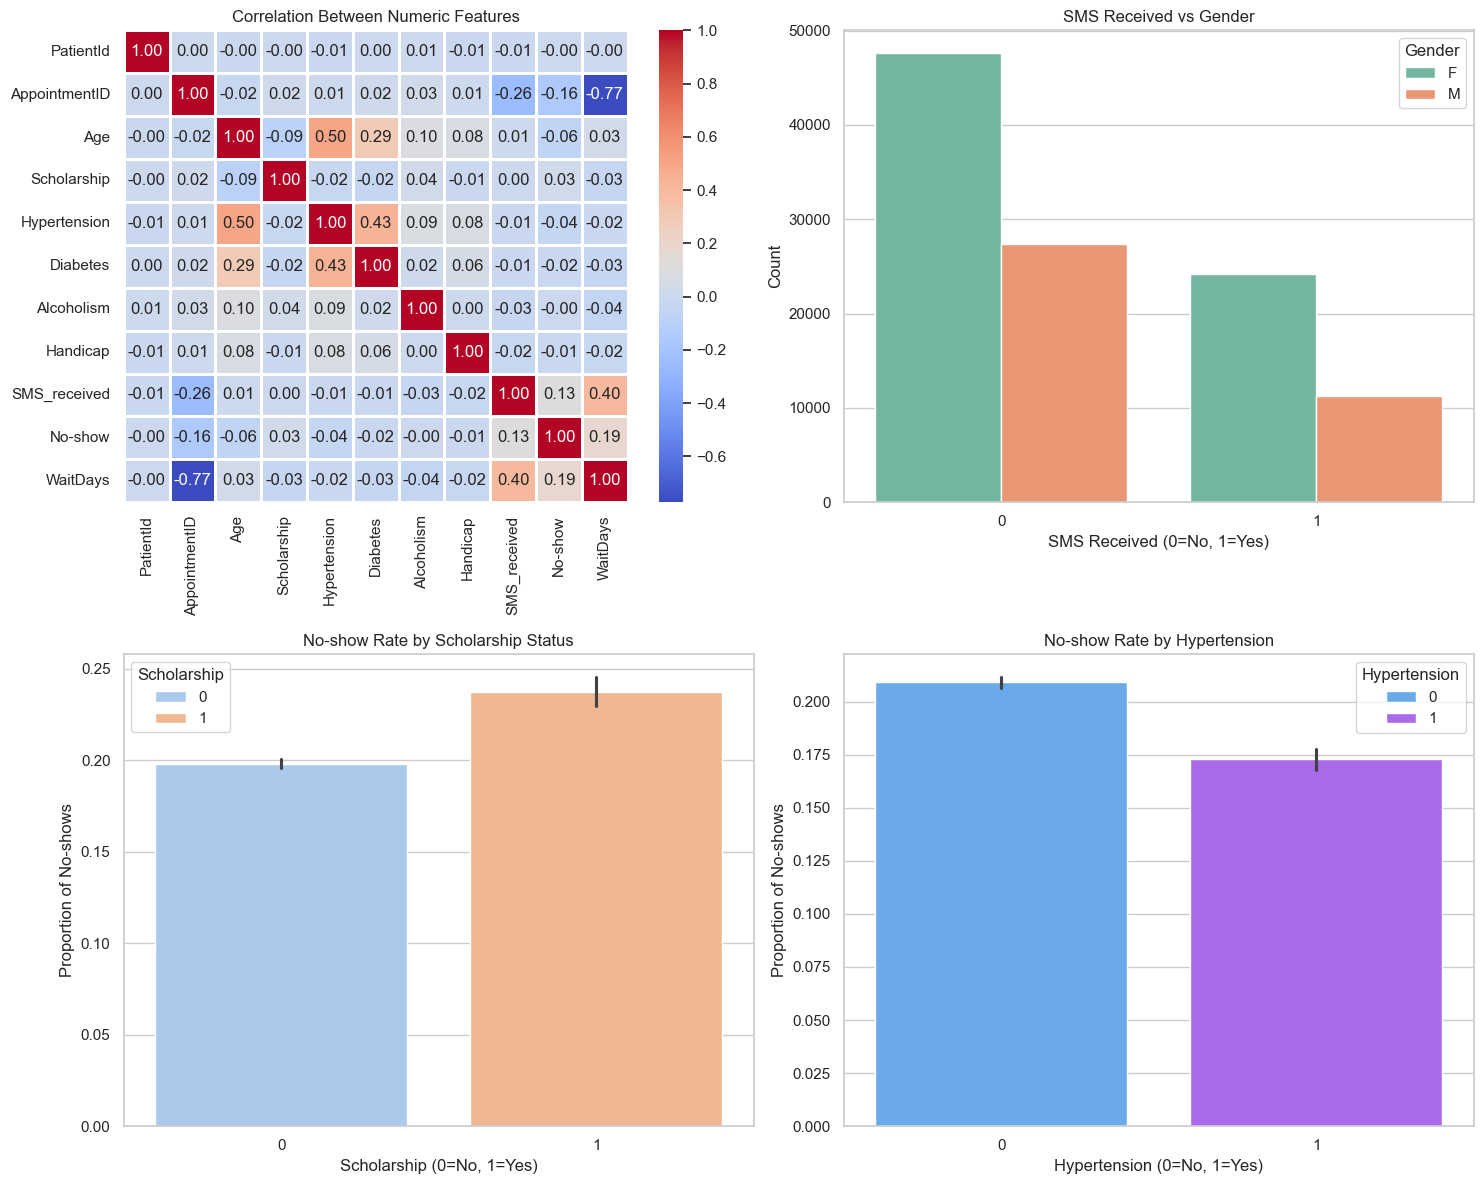

In [129]:
fig, axes = plt.subplots(2, 2, figsize=(15,12))

# Correlation heatmap
numeric_cols = appointments.select_dtypes(include=["int64", "float64"])
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", linewidths=2,fmt=".2f", ax=axes[0,0])
axes[0,0].set_title("Correlation Between Numeric Features")

# SMS + Gender vs No-show
sns.countplot(x="SMS_received", hue="Gender", data=appointments, palette="Set2", ax=axes[0,1])
axes[0,1].set_title("SMS Received vs Gender")
axes[0,1].set_xlabel("SMS Received (0=No, 1=Yes)")
axes[0,1].set_ylabel("Count")
axes[0,1].legend(title="Gender")

# Scholarship vs No-show
sns.barplot(x="Scholarship", y="No-show", data=appointments, hue="Scholarship",ax=axes[1,0], palette="pastel")
axes[1,0].set_title("No-show Rate by Scholarship Status")
axes[1,0].set_xlabel("Scholarship (0=No, 1=Yes)")
axes[1,0].set_ylabel("Proportion of No-shows")

# Hypertension vs No-show
sns.barplot(x="Hypertension", y="No-show", data=appointments, hue="Hypertension",ax=axes[1,1], palette="cool")
axes[1,1].set_title("No-show Rate by Hypertension")
axes[1,1].set_xlabel("Hypertension (0=No, 1=Yes)")
axes[1,1].set_ylabel("Proportion of No-shows")

plt.tight_layout()

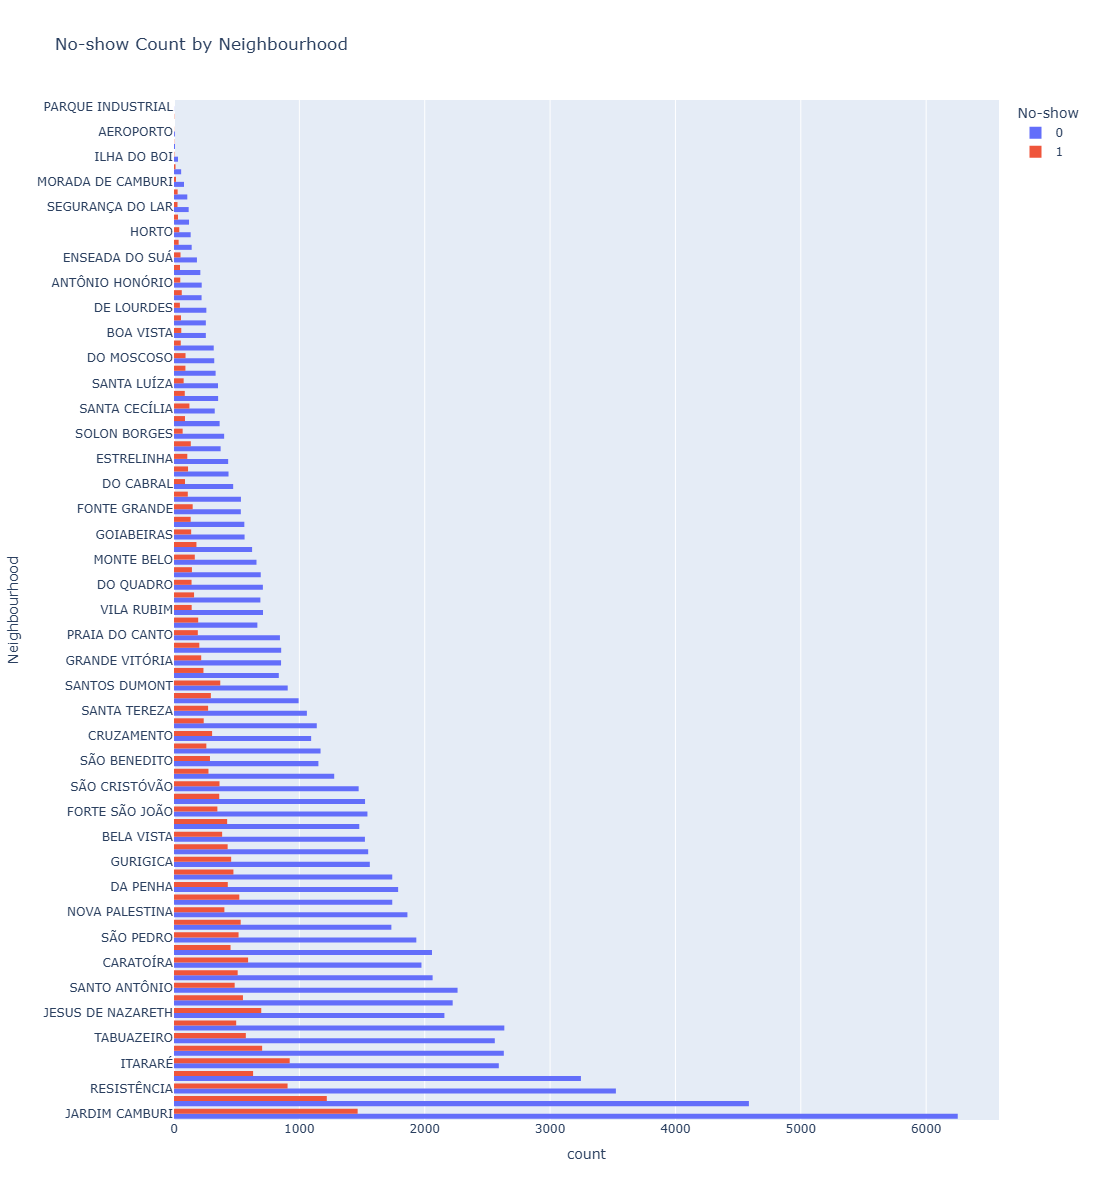

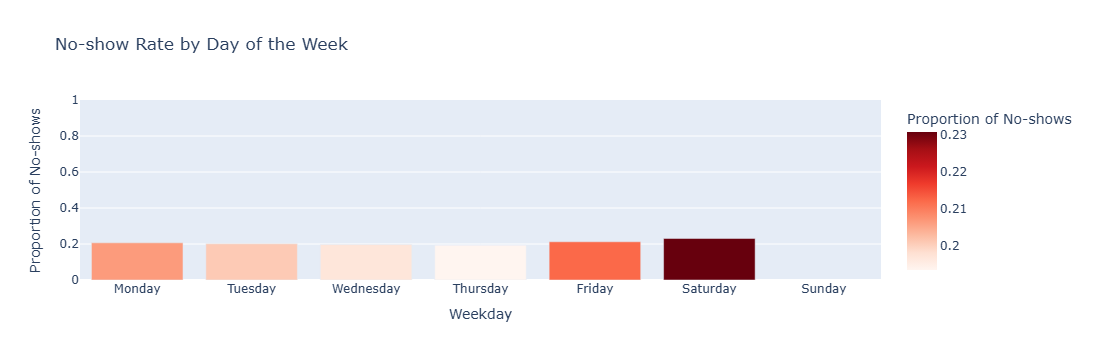

In [144]:
fig_neigh = px.histogram(
    appointments,
    y='Neighbourhood',
    color='No-show',
    category_orders={'Neighbourhood': appointments['Neighbourhood'].value_counts().index.tolist()},
    title='No-show Count by Neighbourhood',
    height=1200,  # adjust height for readability
    labels={'No-show':'No-show', 'Neighbourhood':'Neighbourhood'},
    barmode='group'
)

fig_neigh.update_layout(yaxis={'categoryorder':'total descending'})
fig_neigh.show()

# Weekday Analysis vs No-show
weekday_data = appointments.groupby('AppointmentWeekday')['No-show'].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
).reset_index()

fig_weekday = px.bar(
    weekday_data,
    x='AppointmentWeekday',
    y='No-show',
    title='No-show Rate by Day of the Week',
    labels={'No-show':'Proportion of No-shows', 'AppointmentWeekday':'Weekday'},
    color='No-show',
    color_continuous_scale="Reds"
)
fig_weekday.update_yaxes(range=[0,1])

# Show Weekday plot
fig_weekday.show()

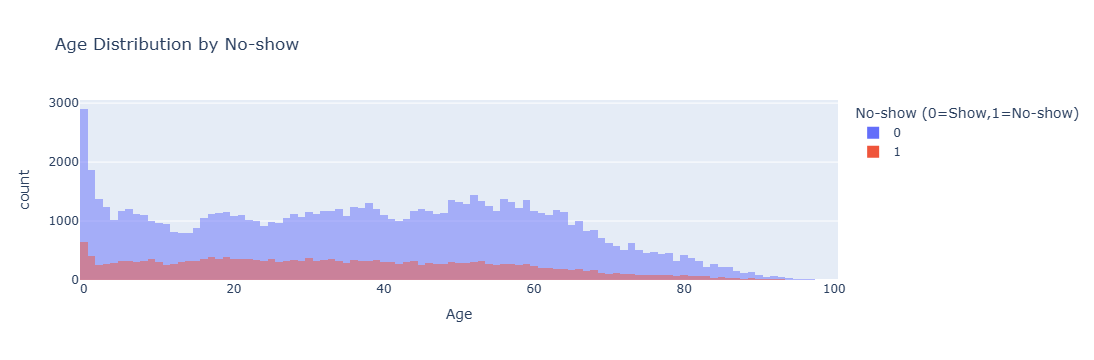

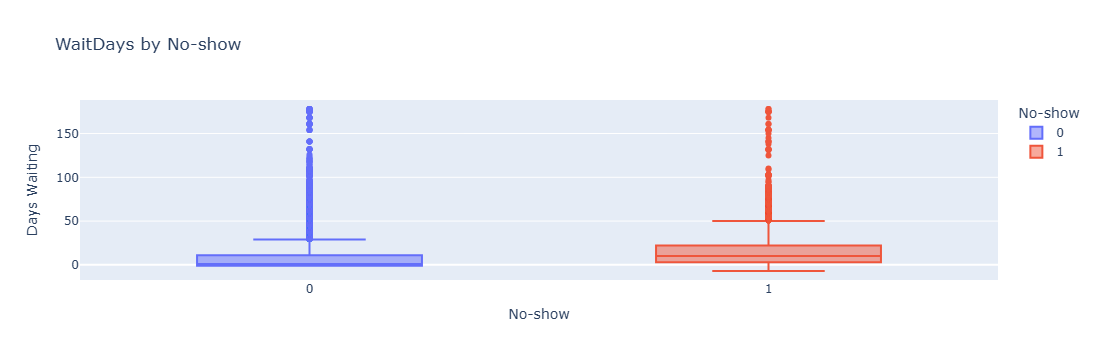

In [109]:
# Age distribution by No-show
fig = px.histogram(appointments, x='Age', color='No-show', barmode='overlay',
                   labels={'No-show': 'No-show (0=Show,1=No-show)'}, title="Age Distribution by No-show")
fig.show()

# WaitDays Boxplot
fig1 = px.box(appointments, x='No-show', y='WaitDays', color='No-show',
             labels={'No-show':'No-show', 'WaitDays':'Days Waiting'}, title="WaitDays by No-show")
fig1.show()


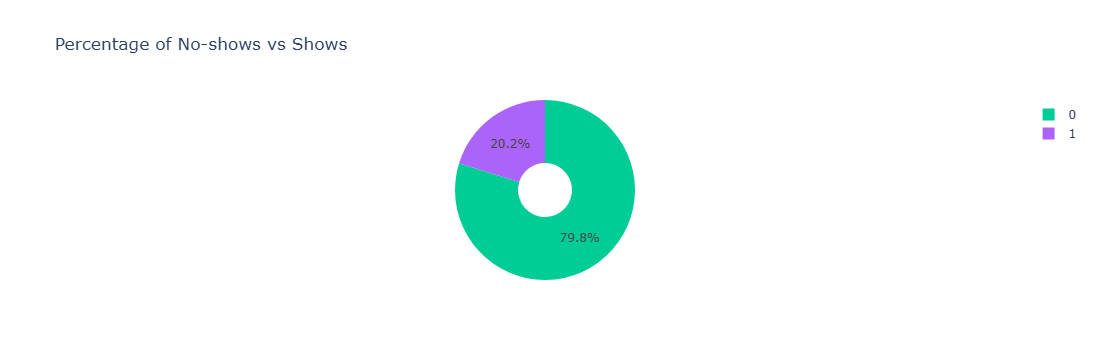

In [110]:
# Count of No-shows
no_show_counts = appointments['No-show'].value_counts().reset_index()
no_show_counts.columns = ['No-show', 'Count']

# Plotly pie chart
fig2 = px.pie(no_show_counts, values='Count', names='No-show',
             color='No-show',
             color_discrete_map={'No': '#66b3ff', 'Yes': '#ff9999'},
             title='Percentage of No-shows vs Shows',
             hole=0.3) 

fig2.show()

## Insights & Observations

#### 1. Overall No-show Rate: approx 20.19% of patients missed appointments.

In [147]:
overall_no_show = appointments['No-show'].mean() * 100
print(f"1. Overall No-show Rate: {overall_no_show:.2f}% of patients missed their appointments.")

1. Overall No-show Rate: 20.19% of patients missed their appointments.


#### 2. Age: Younger adults (18-40) have slightly higher no-show rates.

In [148]:
age_bins = [0, 18, 40, 60, 100]
age_labels = ['0-18', '19-40', '41-60', '61+']
appointments['AgeGroup'] = pd.cut(appointments['Age'], bins=age_bins, labels=age_labels)
age_no_show = appointments.groupby('AgeGroup',observed=False)['No-show'].mean() * 100
print("2. No-show Rate by Age Group:")
for group, rate in age_no_show.items():
    print(f"   {group}: {rate:.2f}%")

2. No-show Rate by Age Group:
   0-18: 22.54%
   19-40: 23.18%
   41-60: 18.59%
   61+: 15.20%


#### 3. Gender: Females/males show similar attendance, slight variation.

In [149]:
gender_no_show = appointments.groupby('Gender')['No-show'].mean() * 100
print("3. No-show Rate by Gender:")
for gender, rate in gender_no_show.items():
    print(f"   {gender}: {rate:.2f}%")

3. No-show Rate by Gender:
   F: 20.31%
   M: 19.97%


#### 4. SMS reminders: Patients receiving SMS are less likely to miss appointments.

In [150]:
sms_no_show = appointments.groupby('SMS_received')['No-show'].mean() * 100
print("4. No-show Rate by SMS Received (0=No, 1=Yes):")
for sms, rate in sms_no_show.items():
    print(f"   SMS {sms}: {rate:.2f}%")

4. No-show Rate by SMS Received (0=No, 1=Yes):
   SMS 0: 16.70%
   SMS 1: 27.57%


#### 5. Weekday & Month: Mondays have highest no-shows, weekends lowest.

In [151]:
weekday_no_show = appointments.groupby('AppointmentWeekday')['No-show'].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
) * 100
print("5. No-show Rate by Appointment Weekday:")
for day, rate in weekday_no_show.items():
    print(f"   {day}: {rate:.2f}%")

5. No-show Rate by Appointment Weekday:
   Monday: 20.65%
   Tuesday: 20.09%
   Wednesday: 19.69%
   Thursday: 19.35%
   Friday: 21.23%
   Saturday: 23.08%
   Sunday: nan%


#### 6. Neighbourhood: Certain neighborhoods show higher no-show counts (top 20 highlighted).

In [152]:
top20_neigh = appointments.groupby('Neighbourhood')['No-show'].mean().sort_values(ascending=False).head(20) * 100
print("6. Top 20 Neighbourhoods by No-show Rate:")
for neigh, rate in top20_neigh.items():
    print(f"   {neigh}: {rate:.2f}%")

6. Top 20 Neighbourhoods by No-show Rate:
   ILHAS OCEÂNICAS DE TRINDADE: 100.00%
   SANTOS DUMONT: 28.92%
   SANTA CECÍLIA: 27.46%
   SANTA CLARA: 26.48%
   ITARARÉ: 26.27%
   JESUS DE NAZARETH: 24.40%
   HORTO: 24.00%
   ILHA DO PRÍNCIPE: 23.48%
   CARATOÍRA: 23.04%
   ANDORINHAS: 23.03%
   PRAIA DO SUÁ: 22.83%
   GURIGICA: 22.60%
   BENTO FERREIRA: 22.49%
   PARQUE MOSCOSO: 22.32%
   MARUÍPE: 22.29%
   DO MOSCOSO: 22.28%
   ENSEADA DO SUÁ: 22.13%
   ARIOVALDO FAVALESSA: 21.99%
   ILHA DAS CAIEIRAS: 21.94%
   FONTE GRANDE: 21.85%


#### 7. Health Conditions: High-risk patients (Hypertension, Diabetes, Alcoholism, Handicap) have minorly higher no-show.

In [153]:
health_conditions = appointments.groupby(['Hypertension','Diabetes','Alcoholism','Handicap'])['No-show'].mean() * 100
print("7. No-show Rate by Health Conditions (0=No, 1=Yes for each condition):")
for cond, rate in health_conditions.items():
    print(f"   Hypertension={cond[0]}, Diabetes={cond[1]}, Alcoholism={cond[2]}, Handicap={cond[3]}: {rate:.2f}%")

7. No-show Rate by Health Conditions (0=No, 1=Yes for each condition):
   Hypertension=0, Diabetes=0, Alcoholism=0, Handicap=0: 20.93%
   Hypertension=0, Diabetes=0, Alcoholism=0, Handicap=1: 20.13%
   Hypertension=0, Diabetes=0, Alcoholism=0, Handicap=2: 13.40%
   Hypertension=0, Diabetes=0, Alcoholism=0, Handicap=3: 22.22%
   Hypertension=0, Diabetes=0, Alcoholism=0, Handicap=4: 33.33%
   Hypertension=0, Diabetes=0, Alcoholism=1, Handicap=0: 21.64%
   Hypertension=0, Diabetes=0, Alcoholism=1, Handicap=1: 9.68%
   Hypertension=0, Diabetes=0, Alcoholism=1, Handicap=2: 100.00%
   Hypertension=0, Diabetes=0, Alcoholism=1, Handicap=3: 0.00%
   Hypertension=0, Diabetes=1, Alcoholism=0, Handicap=0: 20.36%
   Hypertension=0, Diabetes=1, Alcoholism=0, Handicap=1: 7.69%
   Hypertension=0, Diabetes=1, Alcoholism=0, Handicap=2: 0.00%
   Hypertension=0, Diabetes=1, Alcoholism=1, Handicap=0: 16.00%
   Hypertension=0, Diabetes=1, Alcoholism=1, Handicap=1: 100.00%
   Hypertension=1, Diabetes=0, Alco

#### 8. Scholarship: Patients on social welfare program show similar/no significant variation.

In [154]:
scholarship_no_show = appointments.groupby('Scholarship')['No-show'].mean() * 100
print("8. No-show Rate by Scholarship Status (0=No, 1=Yes):")
for status, rate in scholarship_no_show.items():
    print(f"   Scholarship {status}: {rate:.2f}%")

8. No-show Rate by Scholarship Status (0=No, 1=Yes):
   Scholarship 0: 19.81%
   Scholarship 1: 23.74%


## Recommendations

#### 1.Send SMS reminders to all patients systematically.

#### 2.Focus on neighborhoods with high no-show rates.

#### 3.Consider scheduling high-risk patients earlier in the week.

#### 4.Use insights for hospital resource planning (staffing, equipment, appointment slots).

## Conclusion

**This analysis shows the main reasons why patients miss their appointments. Younger adults, certain weekdays, and some neighbourhoods have higher no-show rates. Receiving an SMS reminder helps patients show up. Health conditions and scholarship status do not affect attendance much.**

**By using these insights, hospitals can send SMS reminders, focus on high-risk neighbourhoods, and schedule patients more effectively to reduce missed appointments and improve patient care.**